In [ ]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/ThuyetTrinh/Supermarket-Sales-Data-Analysis-master/supermarket_sales - Sheet1.csv')

# Kiểm tra và xử lý dữ liệu không hợp lệ
df.dropna(inplace=True)  # Xóa các dòng có giá trị bị thiếu
df.drop_duplicates(inplace=True)  # Xóa các dòng bị trùng lắp

# Kiểm tra kiểu dữ liệu của các cột và chuyển đổi nếu cần thiết
df['Date'] = pd.to_datetime(df['Date'])  # Chuyển cột 'Date' thành kiểu datetime

# Tiến hành tiền xử lý dữ liệu khác nếu cần thiết

# Lưu trữ dữ liệu đã được làm sạch
df.to_csv('cleaned_data.csv', index=False)
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Total,Date,Time
0,750-67-8428,A,Yangon,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08
1,226-31-3081,C,Naypyitaw,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29
2,631-41-3108,A,Yangon,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23
3,123-19-1176,A,Yangon,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33
4,373-73-7910,A,Yangon,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37


In [ ]:
# Loại bỏ các hàng có giá trị NaN
df_cleaned = df.dropna(axis=0)
print(df_cleaned)

      Invoice ID Branch       City  Gender            Product line  \
0    750-67-8428      A     Yangon  Female       Health and beauty   
1    226-31-3081      C  Naypyitaw  Female  Electronic accessories   
2    631-41-3108      A     Yangon    Male      Home and lifestyle   
3    123-19-1176      A     Yangon    Male       Health and beauty   
4    373-73-7910      A     Yangon    Male       Sports and travel   
..           ...    ...        ...     ...                     ...   
995  233-67-5758      C  Naypyitaw    Male       Health and beauty   
996  303-96-2227      B   Mandalay  Female      Home and lifestyle   
997  727-02-1313      A     Yangon    Male      Food and beverages   
998  347-56-2442      A     Yangon    Male      Home and lifestyle   
999  849-09-3807      A     Yangon  Female     Fashion accessories   

     Unit price  Quantity      Total       Date   Time  
0         74.69         7   548.9715 2019-01-05  13:08  
1         15.28         5    80.2200 2019-03-

In [ ]:
# Loại bỏ giá trị thừa trong cột "Product line"
df["Product line"] = df["Product line"].str.strip()  # Loại bỏ khoảng trống ở đầu và cuối
df

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Total,Date,Time
0,750-67-8428,A,Yangon,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08
1,226-31-3081,C,Naypyitaw,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29
2,631-41-3108,A,Yangon,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23
3,123-19-1176,A,Yangon,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33
4,373-73-7910,A,Yangon,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37
...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Male,Health and beauty,40.35,1,42.3675,2019-01-29,13:46
996,303-96-2227,B,Mandalay,Female,Home and lifestyle,97.38,10,1022.4900,2019-03-02,17:16
997,727-02-1313,A,Yangon,Male,Food and beverages,31.84,1,33.4320,2019-02-09,13:22
998,347-56-2442,A,Yangon,Male,Home and lifestyle,65.82,1,69.1110,2019-02-22,15:33


In [ ]:
# Kiểm tra dữ liệu đã được loại bỏ giá trị thừa
unique_values = df["Product line"].unique()
print(unique_values)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [ ]:
# Loại bỏ các giá trị thừa trong cột 'Unit price'
df['Unit price'] = df['Unit price'].drop_duplicates()
df

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Total,Date,Time
0,750-67-8428,A,Yangon,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08
1,226-31-3081,C,Naypyitaw,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29
2,631-41-3108,A,Yangon,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23
3,123-19-1176,A,Yangon,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33
4,373-73-7910,A,Yangon,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37
...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Male,Health and beauty,40.35,1,42.3675,2019-01-29,13:46
996,303-96-2227,B,Mandalay,Female,Home and lifestyle,97.38,10,1022.4900,2019-03-02,17:16
997,727-02-1313,A,Yangon,Male,Food and beverages,31.84,1,33.4320,2019-02-09,13:22
998,347-56-2442,A,Yangon,Male,Home and lifestyle,65.82,1,69.1110,2019-02-22,15:33


In [ ]:
# Kiểm tra dữ liệu sau khi loại bỏ giá trị thừa
print(df['Unit price'])

0      74.69
1      15.28
2      46.33
3      58.22
4      86.31
       ...  
995    40.35
996    97.38
997    31.84
998    65.82
999    88.34
Name: Unit price, Length: 1000, dtype: float64


In [ ]:
#Thay đổi kiểu dữ liệu
df['Quantity'] = pd.to_numeric(df['Quantity'], downcast='integer')
print(df['Quantity'].dtypes)
df['Unit price'] = pd.to_numeric(df['Unit price'], downcast='float')
print(df['Unit price'].dtypes)

int8
float32


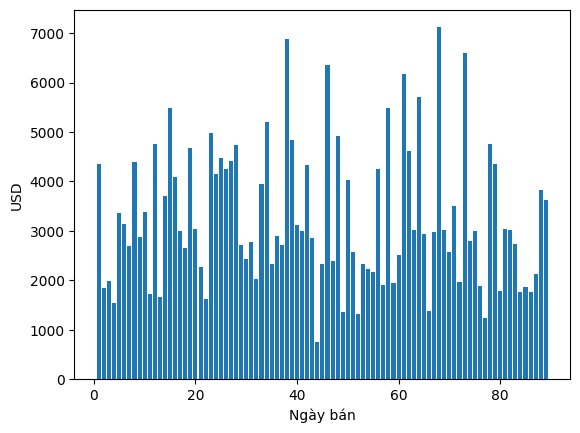

In [ ]:
# Thêm cột 'TotalSales' là tổng doanh thu bán được (Quantity * Unit price)
df['TotalSales'] = df['Quantity'] * df['Unit price']

# Tạo một DataFrame mới chỉ chứa cột 'TotalSales'
df_TotalSales = df.groupby('Date')['TotalSales'].sum()

# Hiển thị biểu đồ cột
days = range(1, len(df_TotalSales) + 1)
plt.bar(days, df_TotalSales)
plt.xlabel('Ngày bán')
plt.ylabel('USD')
plt.show()

In [ ]:
#Tổng các giá trị cột TotalSales theo từng ngày của cột Date
#max min
TotalSales_value = df.groupby ('Date').sum(['total sales'])
TotalSales_value.max()

Unit price    1121.930054
Quantity       128.000000
Total         7474.047000
TotalSales    7118.140137
dtype: float64

In [ ]:
TotalSales_value.min()

Unit price    270.610016
Quantity       18.000000
Total         934.237500
TotalSales    760.750000
dtype: float64

In [ ]:
# Tính giá trị lớn nhất và nhỏ nhất của cột 'TotalSales'
TotalSales_max = df_TotalSales.max()
TotalSales_min = df_TotalSales.min()

# In ra giá trị lớn nhất và nhỏ nhất của cột 'TotalSales'
print('Max value of TotalSales:', TotalSales_max)
print('Min value of TotalSales:', TotalSales_min)

# Tạo một DataFrame mới chỉ chứa các cột cần thiết
df_cleaned = df[['Date', 'TotalSales']]

# Lưu trữ dữ liệu đã được làm sạch
df_cleaned.to_csv('/content/drive/MyDrive/ThuyetTrinh/cleaned_data.csv', index=False)

# Hiển thị 5 dòng đầu tiên của DataFrame sau khi làm sạch
print(df_cleaned.head())

Max value of TotalSales: 7118.14
Min value of TotalSales: 760.75
        Date  TotalSales
0 2019-01-05  522.830017
1 2019-03-08   76.400002
2 2019-03-03  324.309998
3 2019-01-27  465.760010
4 2019-02-08  604.169983


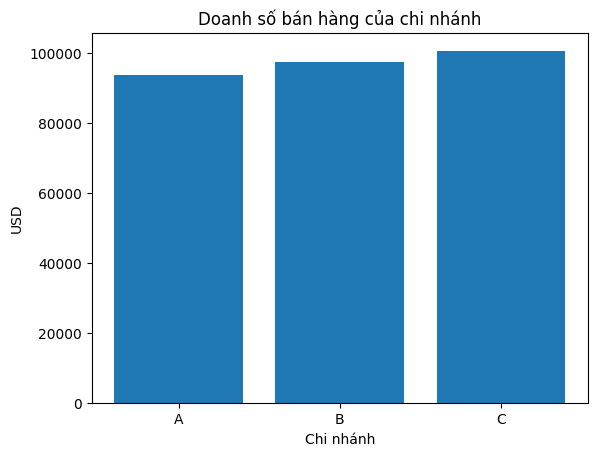

In [ ]:
#Biểu đồ doanh số bán hàng của các chi nhánh
branch_sales = df.groupby("Branch")["TotalSales"].sum()

plt.bar(branch_sales.index, branch_sales.values)
plt.xlabel("Chi nhánh")
plt.ylabel("USD")
plt.title("Doanh số bán hàng của chi nhánh")
plt.show()

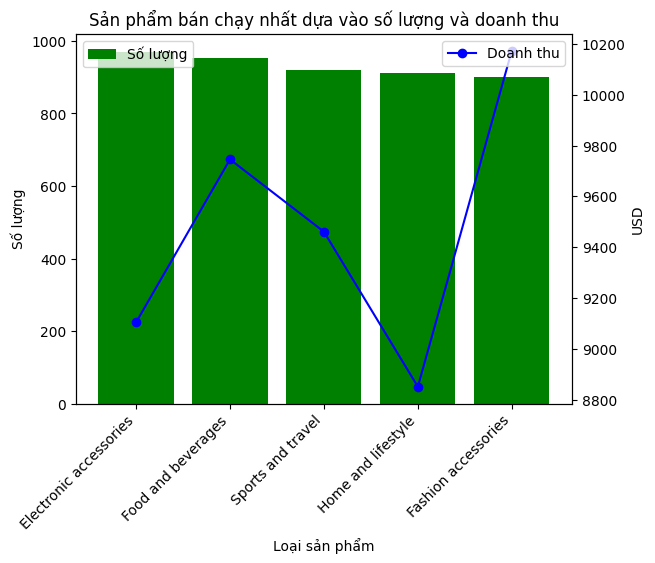

In [ ]:
# Tạo DataFrame mới chứa sản phẩm bán chạy nhất và doanh thu tương ứng
top_products = df.groupby('Product line').agg({'Quantity': sum, 'Unit price': sum})
top_products = top_products.nlargest(5, 'Quantity')

# Vẽ biểu đồ
fig, ax1 = plt.subplots()

# Biểu đồ số lượng (cột màu xanh lá)
ax1.bar(top_products.index, top_products['Quantity'], color='green')
ax1.set_ylabel('Số lượng')
ax1.set_xlabel('Loại sản phẩm')
ax1.set_title('Sản phẩm bán chạy nhất dựa vào số lượng và doanh thu')
ax1.tick_params(axis='y')
# Sửa đổi chữ bên dưới trục x
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Biểu đồ doanh thu (miền màu xanh dương)
ax2 = ax1.twinx()
ax2.plot(top_products.index, top_products['Unit price'], color='blue', marker='o')
ax2.set_ylabel('USD')
ax2.tick_params(axis='y')

# Thêm chú thích
ax1.legend(['Số lượng'], loc='upper left')
ax2.legend(['Doanh thu'], loc='upper right')

plt.show()